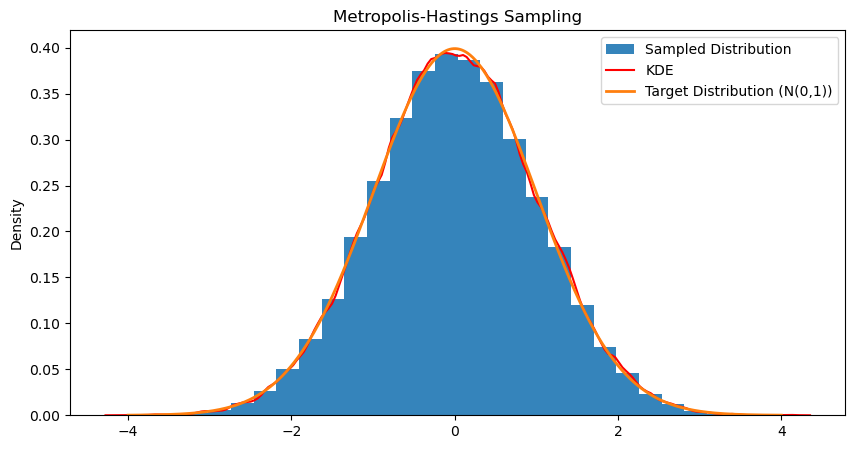

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 목표 분포: 표준 정규분포 (N(0, 1))
def target_distribution(x):
    return np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi)

# 제안 분포: 대칭 정규분포 N(x'; sigma^2)
def proposal_distribution(x_prime, sigma=1.0):
    return np.random.normal(loc=x_prime, scale=sigma)

# Metropolis-Hastings Algorithm
def metropolis_hastings(target_dist, proposal_dist, n_samples=10000, sigma=1.0):
    samples = []
    x_current = 0  # 초기 상태
    for _ in range(n_samples):
        # 1. 새로운 샘플 제안
        x_proposed = proposal_dist(x_current, sigma)
        
        # 2. 수락 확률 계산
        acceptance_ratio = target_dist(x_proposed) / target_dist(x_current)
        acceptance_prob = min(1, acceptance_ratio)
        
        # 3. 수락 또는 거절
        if np.random.rand() < acceptance_prob:
            x_current = x_proposed  # 새로운 샘플 수락
        
        # 4. 샘플 저장
        samples.append(x_current)
    
    return np.array(samples)

# 실행
np.random.seed(42)
samples = metropolis_hastings(target_distribution, proposal_distribution, n_samples=100_000, sigma=1.0)

# 결과 시각화
x = np.linspace(-4, 4, 1000)
plt.figure(figsize=(10, 5))
plt.hist(samples, bins=30, density=True, alpha=0.9, label="Sampled Distribution")
sns.kdeplot(samples, bw_adjust=0.5, label="KDE", color='r')  # KDE 추가
plt.plot(x, target_distribution(x), label="Target Distribution (N(0,1))", linewidth=2)
plt.legend()
plt.title("Metropolis-Hastings Sampling")
plt.show()